This is the list of references that have been used for this project:

References:

1) https://paul-mora.com/classification/time-series/clustering/python/Dynamic-Time-Warping-Explanation-and-Testing-on-Audio-and-Tabular-Data/

2)https://librosa.org/librosa_gallery/auto_examples/plot_music_sync.html

3)https://www.databricks.com/blog/2019/04/30/understanding-dynamic-time-warping.html

In [ ]:
from __future__ import print_function
import numpy as np
import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display
import librosa.core

In [ ]:
from google.colab import files
audio1 = files.upload()
audio2 = files.upload()
def upload(audio1,audio2):
    arrays = []
    file_name1 = list(audio1.keys())[0]
    file_path1 = '/content/' + file_name1
    arr1, sampling_rate = librosa.load(file_path1)

    file_name2 = list(audio2.keys())[0]
    file_path2 = '/content/' + file_name2
    arr2, sampling_rate = librosa.load(file_path2)

    arrays.append(arr1)
    arrays.append(arr2)
    return arrays

Saving audio_with_clear_background.mp3 to audio_with_clear_background (2).mp3


Saving audio_with_noisy_background.mp3 to audio_with_noisy_background.mp3


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/display.py:736: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  out = axes.fill_between(locs, y_bottom, y_top, **kwargs)


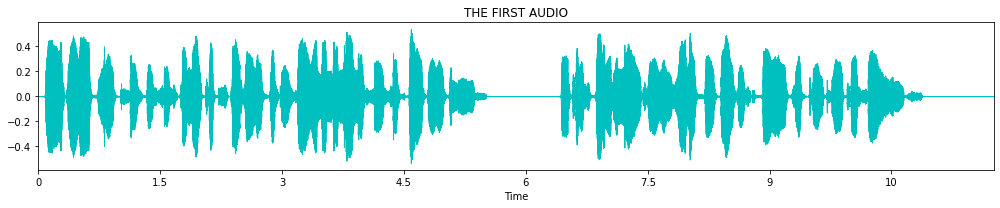

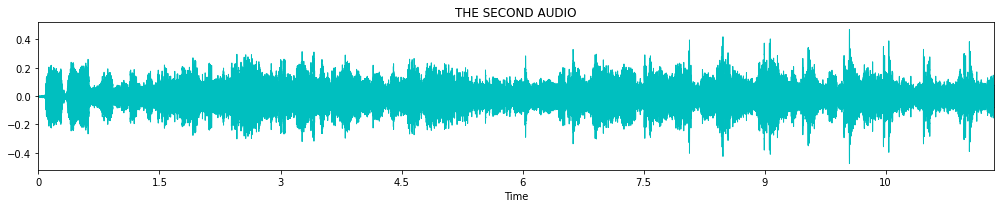

In [ ]:


# The 1st audio is speech with clear background.
# The 2nd audio is the same speech with noisy background
def visualize(audio1,audio2):
    arrays = upload(audio1,audio2)

    plt.figure(figsize=(14, 3))
    librosa.display.waveplot(arrays[0], sr=22050,color = 'C')
    plt.title('THE FIRST AUDIO')
    plt.tight_layout()

    plt.figure(figsize=(14, 3))
    librosa.display.waveplot(arrays[1], sr=22050,color = 'C')
    plt.title('THE SECOND AUDIO')
    plt.tight_layout()

visualize(audio1,audio2)

In [ ]:
def calculate_chromagrams(array1,array2):
    chromas = []
    chroma1 = librosa.feature.chroma_stft(y=array1, sr=22050, tuning=0, norm=2,
                                         hop_length=2205, n_fft=4410)
    chroma2 = librosa.feature.chroma_stft(y=array2, sr=22050, tuning=0, norm=2,
                                         hop_length=2205, n_fft=4410)
    chromas.append(chroma1)
    chromas.append(chroma2)
    return chromas

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


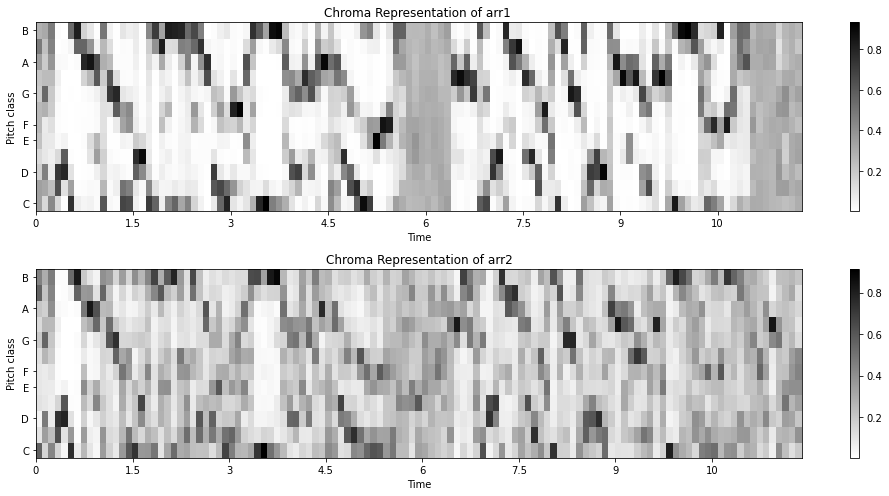

In [ ]:
def plot_chromas(audio1,audio2):
    arrays = upload(audio1,audio2)
    chromas_array = calculate_chromagrams(arrays[0],arrays[1])
    size=(14, 7)
    plt.figure(figsize=size)
    plt.subplot(2, 1, 1)
    plt.title('Chroma Representation of arr1 ')
    librosa.display.specshow(chromas_array[0], x_axis='time',
                            y_axis='chroma', cmap='gray_r', hop_length=2205)
    plt.colorbar()
    plt.subplot(2, 1, 2)
    plt.title('Chroma Representation of arr2')
    librosa.display.specshow(chromas_array[1], x_axis='time',
                            y_axis='chroma', cmap='gray_r', hop_length=2205)
    plt.colorbar()
    plt.tight_layout()
plot_chromas(audio1,audio2)

In [ ]:
def dtw_matrix(x, y, distance=None):
    if distance is None:
        distance = scipy.spatial.distance.euclidean
    matrix = numpy.zeros((len(x)+1, len(y)+1))
    matrix[1:, 0] = numpy.inf
    matrix[0, 1:] = numpy.inf
    for a in range(1, len(x)+1):
        for b in range(1, len(y)+1):
            dist = distance(x[a-1], y[b-1])
            matrix[a, b] = dist + min(matrix[a-1, b], matrix[a, b-1], matrix[a-1, b-1])
    return matrix

In [ ]:
def dtw(x, y, matrix):
    a = len(x)
    b = len(y)
    path = [(a, b)]
    while a > 0 or b > 0:
        minval = numpy.inf
        if matrix[a-1][b-1] < minval:
            minval = matrix[a-1, b-1]
            step = (a-1, b-1)
        if matrix[a-1, b] < minval:
            minval = matrix[a-1, b]
            step = (a-1, b)
        if matrix[a][b-1] < minval:
            minval = matrix[a, b-1]
            step = (a, b-1)
        path.insert(0, step)
        a, b = step
    return numpy.array(path)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


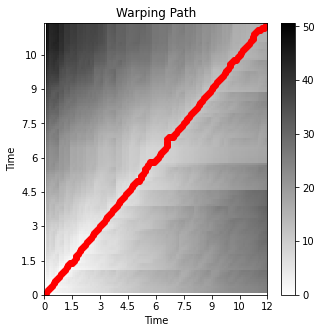

In [ ]:
arrays = upload(audio1,audio2)
array = calculate_chromagrams(arrays[0],arrays[1])
sampling_rate = 22050
cost_matrix = dtw_matrix(array[0].T, array[1].T, distance=scipy.spatial.distance.cosine)
warping_path = dtw(array[0].T, array[1].T, cost_matrix)

paths_array = np.asarray(warping_path) * 2205 / sampling_rate

size =(5,5)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
librosa.display.specshow(cost_matrix, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=2205)
ax.imshow(cost_matrix, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(paths_array[:, 1], paths_array[:, 0], marker='o', color='r')
plt.title('Warping Path')
plt.colorbar()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


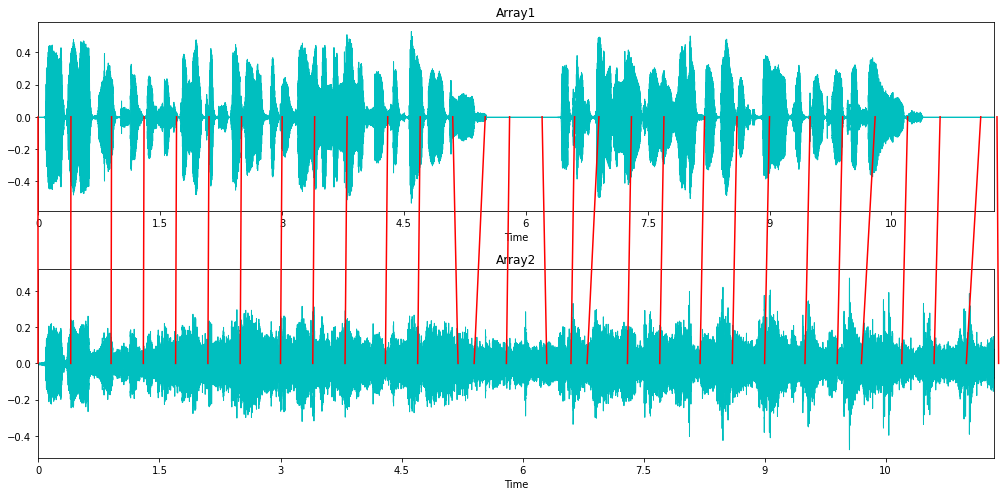

In [ ]:
arrays = upload(audio1,audio2)
size =(14, 7)
sampling_rate = 22050
fig = plt.figure(figsize=size)
plt.subplot(2, 1, 1)
librosa.display.waveplot(arrays[0], sr=sampling_rate,color ='c')
plt.title('Array1')
xarr = plt.gca()

plt.subplot(2, 1, 2)
librosa.display.waveplot(arrays[1], sr=sampling_rate,color ='c')
plt.title('Array2')
yarr = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
matching_lines = []
idxs =np.round(np.linspace(0, warping_path.shape[0] - 1, 30))
points_idx = np.int16(idxs)

for i, j in warping_path[points_idx] * 2205 / sampling_rate:
    line = matplotlib.lines.Line2D((trans_figure.transform(xarr.transData.transform([i, 0]))[0], trans_figure.transform(yarr.transData.transform([j, 0]))[0]),
                                  (trans_figure.transform(xarr.transData.transform([i, 0]))[1], trans_figure.transform(yarr.transData.transform([j, 0]))[1]),
                                  transform=fig.transFigure,
                                  color='r')
    matching_lines.append(line)

fig.lines = matching_lines
plt.tight_layout()

Saving audio3.mp3 to audio3.mp3


Saving audio4.mp3 to audio4.mp3


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

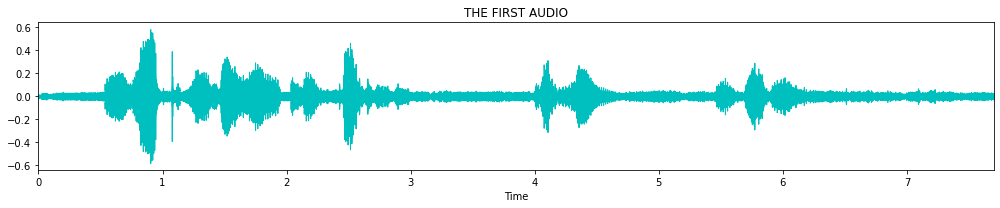

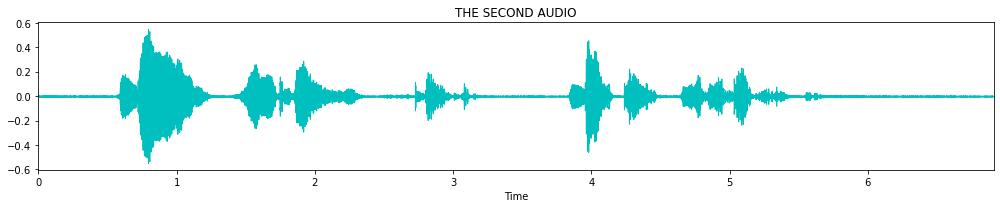

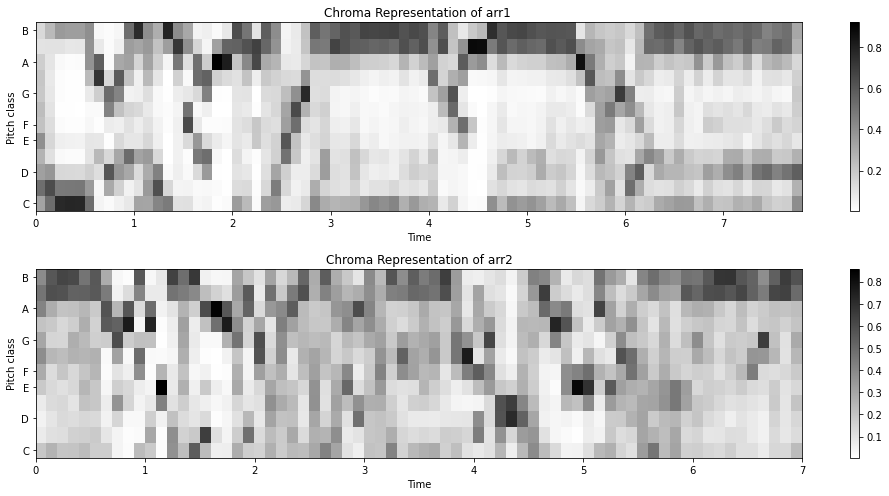

In [ ]:
# These are 2 different audio files with different length/size but similar intonation and speech pattern
audio3 = files.upload()
audio4 = files.upload()
upload(audio3,audio4)
visualize(audio3,audio4)
plot_chromas(audio3,audio4)


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


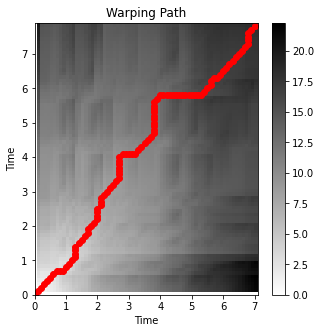

In [ ]:
arrays = upload(audio3,audio4)
array = calculate_chromagrams(arrays[0],arrays[1])
sampling_rate = 22050
cost_matrix = dtw_matrix(array[0].T, array[1].T, distance=scipy.spatial.distance.cosine)
warping_path = dtw(array[0].T, array[1].T, cost_matrix)

paths_array = np.asarray(warping_path) * 2205 / sampling_rate

size =(5,5)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
librosa.display.specshow(cost_matrix, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=2205)
ax.imshow(cost_matrix, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(paths_array[:, 1], paths_array[:, 0], marker='o', color='r')
plt.title('Warping Path')
plt.colorbar()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


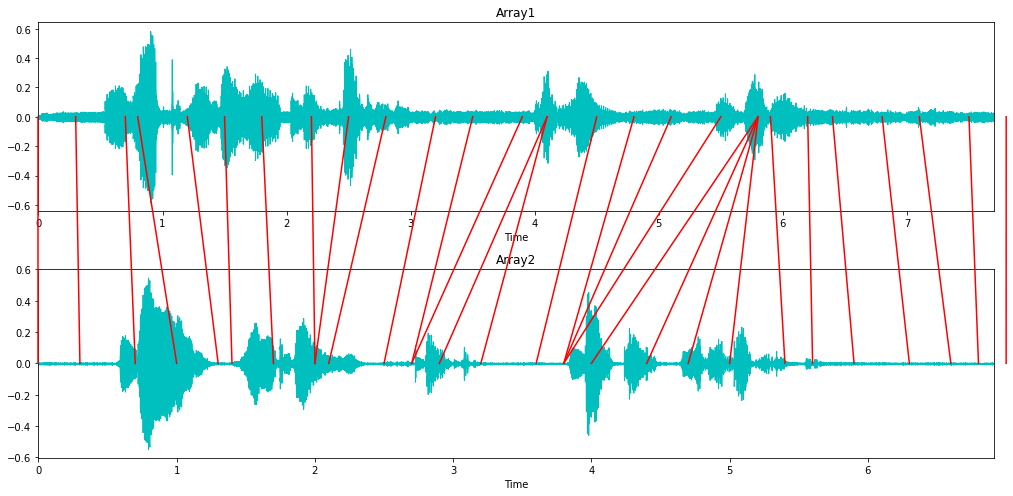

In [ ]:
arrays = upload(audio3,audio4)
size =(14, 7)
fig = plt.figure(figsize=size)
plt.subplot(2, 1, 1)
librosa.display.waveplot(arrays[0], sr=sampling_rate,color ='c')
plt.title('Array1')
xarr = plt.gca()

plt.subplot(2, 1, 2)
librosa.display.waveplot(arrays[1], sr=sampling_rate,color ='c')
plt.title('Array2')
yarr = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
matching_lines = []
idxs =np.round(np.linspace(0, warping_path.shape[0] - 1, 30))
points_idx = np.int16(idxs)

for i, j in warping_path[points_idx] * 2205 / sampling_rate:
    line = matplotlib.lines.Line2D((trans_figure.transform(xarr.transData.transform([i, 0]))[0], trans_figure.transform(yarr.transData.transform([j, 0]))[0]),
                                  (trans_figure.transform(xarr.transData.transform([i, 0]))[1], trans_figure.transform(yarr.transData.transform([j, 0]))[1]),
                                  transform=fig.transFigure,
                                  color='r')
    matching_lines.append(line)

fig.lines = matching_lines
plt.tight_layout()

Saving audio_sir_duke_slow.mp3 to audio_sir_duke_slow.mp3


Saving audio_sir_duke_fast.mp3 to audio_sir_duke_fast.mp3


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

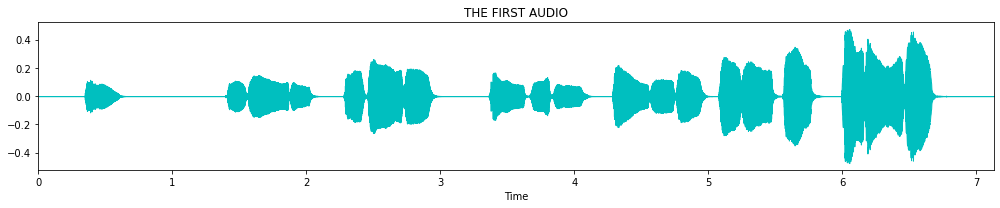

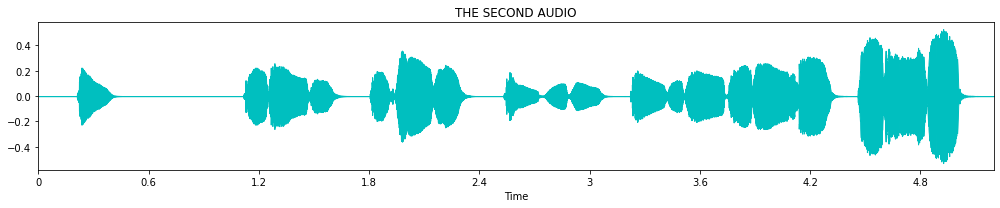

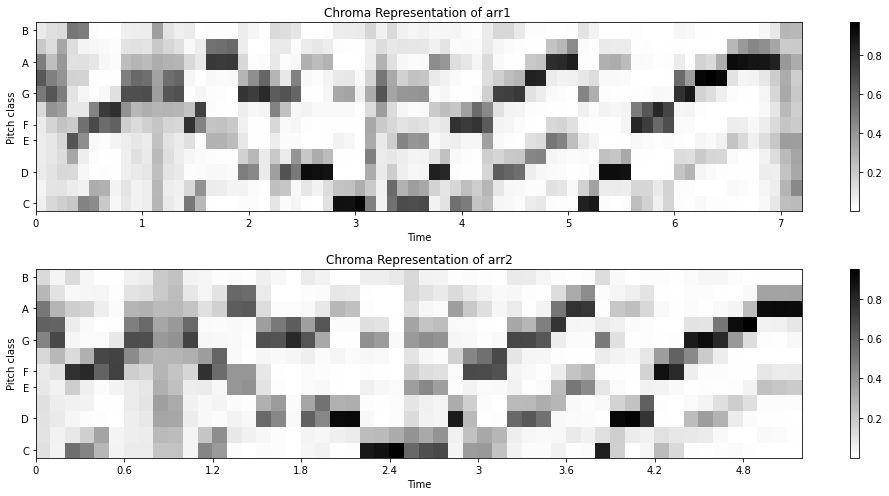

In [ ]:
audio5 = files.upload()
audio6 = files.upload()
upload(audio5,audio6)
visualize(audio5,audio6)
plot_chromas(audio5,audio6)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


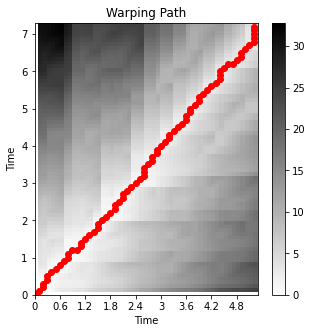

In [ ]:
arrays = upload(audio5,audio6)
array = calculate_chromagrams(arrays[0],arrays[1])
sampling_rate = 22050
cost_matrix = dtw_matrix(array[0].T, array[1].T, distance=scipy.spatial.distance.cosine)
warping_path = dtw(array[0].T, array[1].T, cost_matrix)

paths_array = np.asarray(warping_path) * 2205 / sampling_rate

size =(5,5)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
librosa.display.specshow(cost_matrix, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=2205)
ax.imshow(cost_matrix, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(paths_array[:, 1], paths_array[:, 0], marker='o', color='r')
plt.title('Warping Path')
plt.colorbar()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


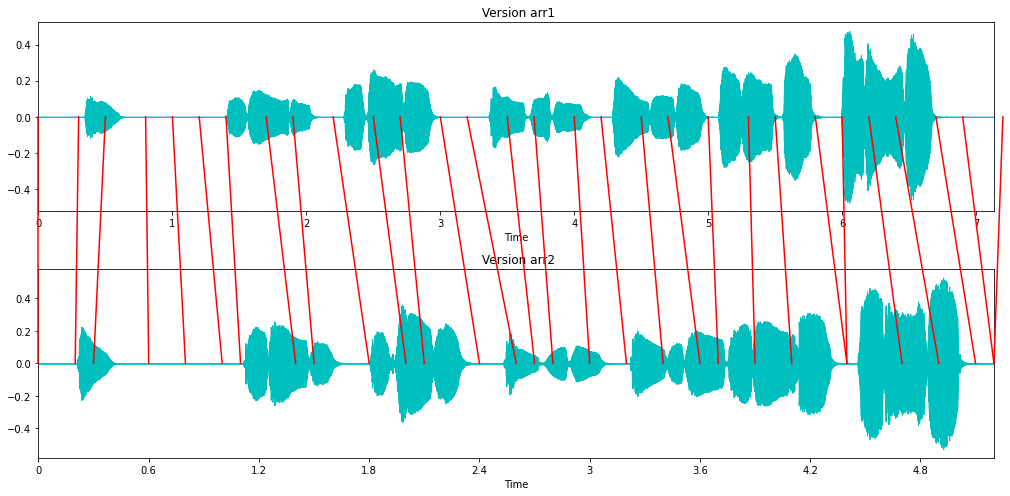

In [ ]:
arrays = upload(audio5,audio6)
size =(14, 7)
fig = plt.figure(figsize=size)

plt.subplot(2, 1, 1)
librosa.display.waveplot(arrays[0], sr=sampling_rate,color ='c')
plt.title(' Version arr1')
xarr1 = plt.gca()

plt.subplot(2, 1, 2)
librosa.display.waveplot(arrays[1], sr=sampling_rate,color ='c')
plt.title(' Version arr2')
xarr2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
matching_lines = []
idxs =np.round(np.linspace(0, warping_path.shape[0] - 1, 30))
points_idx = np.int16(idxs)

for i, j in warping_path[points_idx] * 2205 / sampling_rate:
    line = matplotlib.lines.Line2D((trans_figure.transform(xarr1.transData.transform([i, 0]))[0], trans_figure.transform(xarr2.transData.transform([j, 0]))[0]),
                                   (trans_figure.transform(xarr1.transData.transform([i, 0]))[1], trans_figure.transform(xarr2.transData.transform([j, 0]))[1]),
                                   transform=fig.transFigure,
                                   color='r')
    matching_lines.append(line)

fig.lines = matching_lines
plt.tight_layout()

In [ ]:
# same audio with clear and slightly noisy background
audio7 = files.upload()
audio8 = files.upload()
def upload(audio7,audio8):
    arrays = []
    file_name1 = list(audio7.keys())[0]
    file_path1 = '/content/' + file_name1
    arr1, sampling_rate = librosa.load(file_path1)

    file_name2 = list(audio8.keys())[0]
    file_path2 = '/content/' + file_name2
    arr2, sampling_rate = librosa.load(file_path2)

    arrays.append(arr1)
    arrays.append(arr2)
    return arrays

Saving audio_with_clear_background.mp3 to audio_with_clear_background.mp3


Saving WhatsApp-Audio-2023-01-19-at-19.59.27.mp3 to WhatsApp-Audio-2023-01-19-at-19.59.27.mp3


Saving audio_with_clear_background.mp3 to audio_with_clear_background (4).mp3


Saving WhatsApp-Audio-2023-01-19-at-19.59.27.mp3 to WhatsApp-Audio-2023-01-19-at-19.59.27 (3).mp3


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

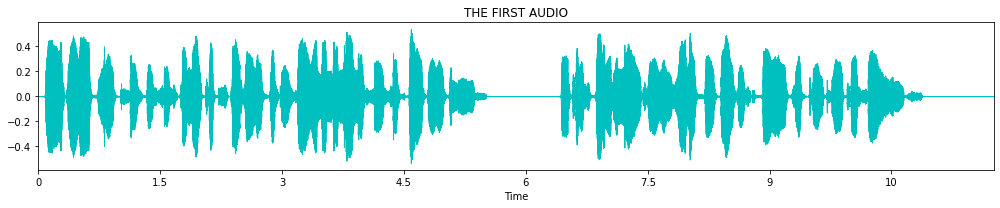

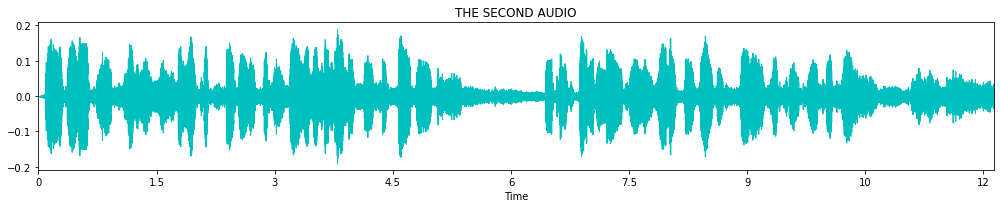

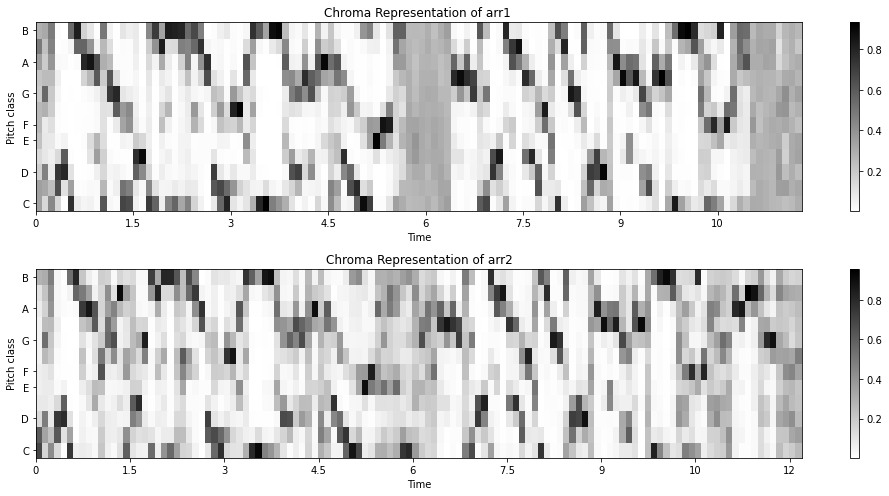

In [ ]:
audio7 = files.upload()
audio8 = files.upload()
upload(audio7,audio8)
visualize(audio7,audio8)
plot_chromas(audio7,audio8)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


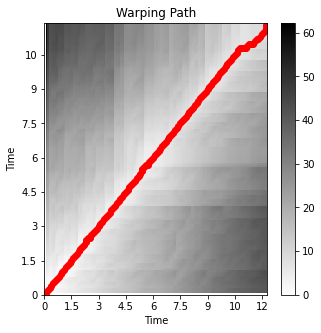

In [ ]:
arrays = upload(audio7,audio8)
array = calculate_chromagrams(arrays[0],arrays[1])
sampling_rate = 22050
cost_matrix = dtw_matrix(array[0].T, array[1].T, distance=scipy.spatial.distance.cosine)
warping_path = dtw(array[0].T, array[1].T, cost_matrix)

paths_array = np.asarray(warping_path) * 2205 / sampling_rate

size =(5,5)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
librosa.display.specshow(cost_matrix, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=2205)
ax.imshow(cost_matrix, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(paths_array[:, 1], paths_array[:, 0], marker='o', color='r')
plt.title('Warping Path')
plt.colorbar()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


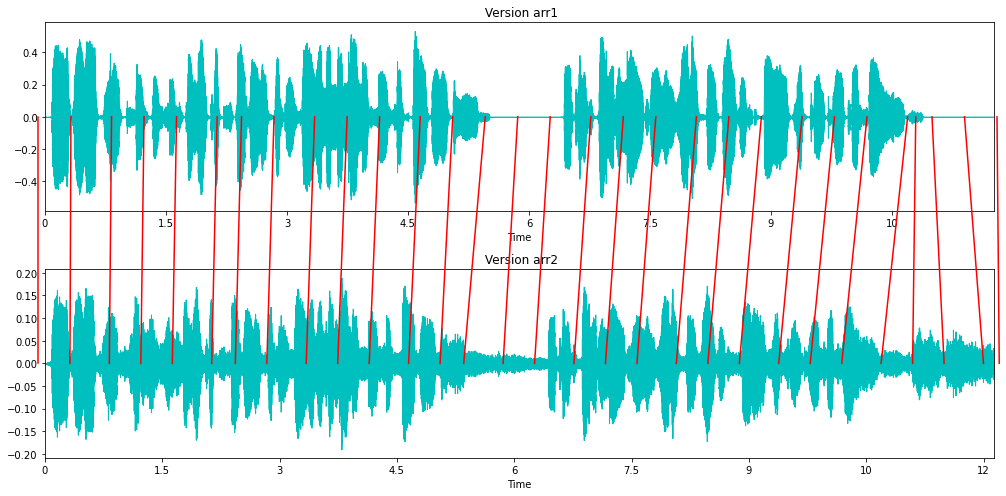

In [ ]:
arrays = upload(audio7,audio8)
size =(14, 7)
fig = plt.figure(figsize=size)

plt.subplot(2, 1, 1)
librosa.display.waveplot(arrays[0], sr=sampling_rate,color ='c')
plt.title(' Version arr1')
xarr1 = plt.gca()

plt.subplot(2, 1, 2)
librosa.display.waveplot(arrays[1], sr=sampling_rate,color ='c')
plt.title(' Version arr2')
xarr2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
matching_lines = []
idxs =np.round(np.linspace(0, warping_path.shape[0] - 1, 30))
points_idx = np.int16(idxs)

for i, j in warping_path[points_idx] * 2205 / sampling_rate:
    line = matplotlib.lines.Line2D((trans_figure.transform(xarr1.transData.transform([i, 0]))[0], trans_figure.transform(xarr2.transData.transform([j, 0]))[0]),
                                   (trans_figure.transform(xarr1.transData.transform([i, 0]))[1], trans_figure.transform(xarr2.transData.transform([j, 0]))[1]),
                                   transform=fig.transFigure,
                                   color='r')
    matching_lines.append(line)

fig.lines = matching_lines
plt.tight_layout()

In [ ]:
# audio with clear and modified version which has the 1st part as slow and 2nd part faster
audio9 = files.upload()
audio10 = files.upload()
def upload(audio7,audio8):
    arrays = []
    file_name1 = list(audio7.keys())[0]
    file_path1 = '/content/' + file_name1
    arr1, sampling_rate = librosa.load(file_path1)

    file_name2 = list(audio8.keys())[0]
    file_path2 = '/content/' + file_name2
    arr2, sampling_rate = librosa.load(file_path2)

    arrays.append(arr1)
    arrays.append(arr2)
    return arrays

Saving audio_with_clear_background.mp3 to audio_with_clear_background (5).mp3


Saving WhatsApp-Audio-2023-01-19-at-20.30.00-_1_.mp3 to WhatsApp-Audio-2023-01-19-at-20.30.00-_1_.mp3


Saving audio_with_clear_background.mp3 to audio_with_clear_background (6).mp3


Saving WhatsApp-Audio-2023-01-19-at-20.30.00-_1_.mp3 to WhatsApp-Audio-2023-01-19-at-20.30.00-_1_ (1).mp3


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

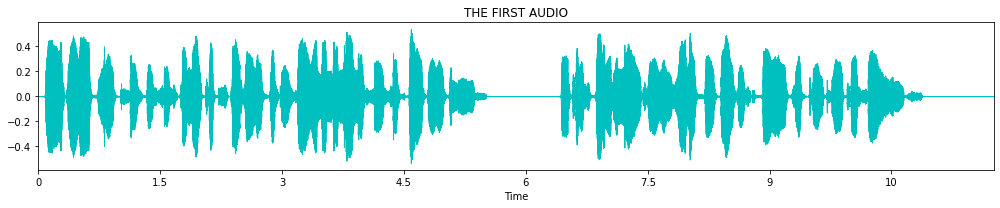

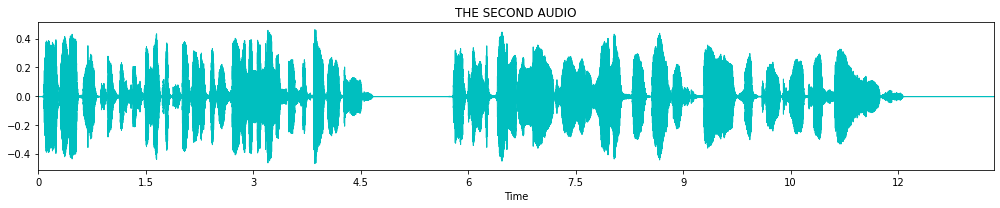

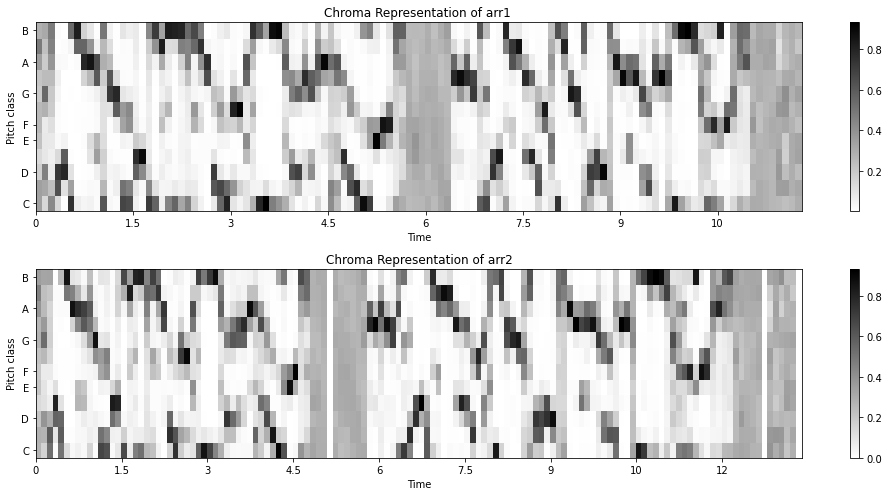

In [ ]:
audio9 = files.upload()
audio10 = files.upload()
upload(audio9,audio10)
visualize(audio9,audio10)
plot_chromas(audio9,audio10)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


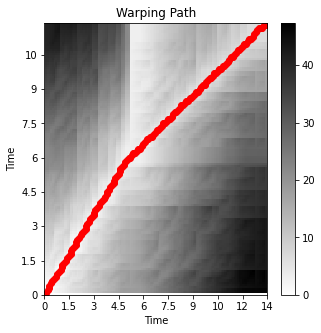

In [ ]:
arrays = upload(audio9,audio10)
array = calculate_chromagrams(arrays[0],arrays[1])
sampling_rate = 22050
cost_matrix = dtw_matrix(array[0].T, array[1].T, distance=scipy.spatial.distance.cosine)
warping_path = dtw(array[0].T, array[1].T, cost_matrix)

paths_array = np.asarray(warping_path) * 2205 / sampling_rate

size =(5,5)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
librosa.display.specshow(cost_matrix, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=2205)
ax.imshow(cost_matrix, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(paths_array[:, 1], paths_array[:, 0], marker='o', color='r')
plt.title('Warping Path')
plt.colorbar()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


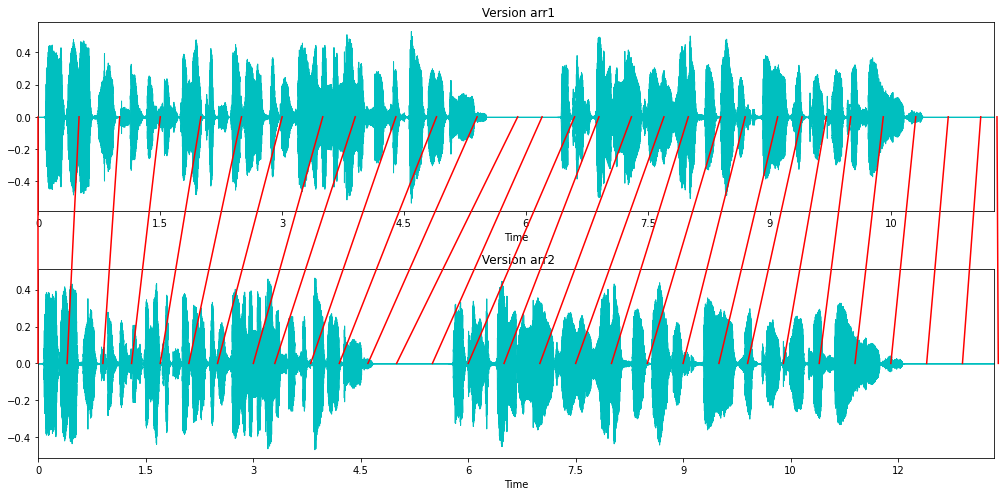

In [35]:
arrays = upload(audio9,audio10)
size =(14, 7)
fig = plt.figure(figsize=size)

plt.subplot(2, 1, 1)
librosa.display.waveplot(arrays[0], sr=sampling_rate,color ='c')
plt.title(' Version arr1')
xarr1 = plt.gca()

plt.subplot(2, 1, 2)
librosa.display.waveplot(arrays[1], sr=sampling_rate,color ='c')
plt.title(' Version arr2')
xarr2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
matching_lines = []
idxs =np.round(np.linspace(0, warping_path.shape[0] - 1, 30))
points_idx = np.int16(idxs)

for i, j in warping_path[points_idx] * 2205 / sampling_rate:
    line = matplotlib.lines.Line2D((trans_figure.transform(xarr1.transData.transform([i, 0]))[0], trans_figure.transform(xarr2.transData.transform([j, 0]))[0]),
                                   (trans_figure.transform(xarr1.transData.transform([i, 0]))[1], trans_figure.transform(xarr2.transData.transform([j, 0]))[1]),
                                   transform=fig.transFigure,
                                   color='r')
    matching_lines.append(line)

fig.lines = matching_lines
plt.tight_layout()